In [1]:
#prep_data.ipynb
#
#by Joe Hahn
#joe.hahn@oracle.com
#2025 March 10
#
#prep nvidia_qa dataset for fine-tuning

In [2]:
#get start time
import time as tm
clock_start = tm.time()

In [3]:
#import usual libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
np.set_printoptions(threshold=200)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
#check version numbers
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)
import oci
print('oci.__version__ = ', oci.__version__)
!echo CONDA_DEFAULT_ENV=$CONDA_DEFAULT_ENV 
!echo BUILD_DATE=$BUILD_DATE 

oci.__version__ =  2.135.0
CONDA_DEFAULT_ENV=/home/datascience/conda/generalml_p311_cpu_x86_64_v1
BUILD_DATE=


In [5]:
#set random number seed
random_state = 12
np.random.seed(seed=random_state)

In [6]:
#set max_colwidth for pandas 
pd.set_option('max_colwidth', 1000)

In [7]:
#read docs downloaded from https://huggingface.co/datasets/ajsbsd/nvidia-qa
file = 'data/NvidiaDocumentationQandApairs.csv'
print ('file = ', file)
df = pd.read_csv(file)
df = df.drop(df.columns[0], axis=1)
print ('df.shape = ', df.shape)
df_raw = df
df_raw.sample(5)

file =  data/NvidiaDocumentationQandApairs.csv
df.shape =  (7108, 2)


,question,answer
4780,What insights can developers gain from learning various debugging techniques?,"Learning various debugging techniques empowers developers to approach complex issues with a broader skill set, enabling them to analyze, troubleshoot, and resolve intricate challenges effectively."
7056,What is the purpose of the STAC-A2 benchmarks?,The STAC-A2 benchmarks aim to represent the standard risk analysis workload that banks and insurance companies use to measure exposure on the financial markets.
168,How does data sharing occur among warps in the GEMM computation?,"Warps within the same row or column share the same fragments of A and B, respectively, optimizing data reuse and maximizing compute intensity."
2956,How can variadic templates improve code readability?,"Variadic templates can improve code readability by reducing the need for multiple overloaded functions or function templates, leading to cleaner and more concise code."
2686,What is the significance of NVIDIA expanding support to other cloud platforms?,NVIDIA's plan to expand NGC support to other cloud platforms will extend the availability of the GPU-accelerated cloud platform to a broader range of cloud users beyond Amazon EC2.


In [8]:
#train_test split = 90:10
train_fraction = 0.9
df = df_raw
df['train_test'] = 'test'
df['ran_num'] = np.random.rand(len(df))
idx = (df.ran_num < train_fraction)
df.loc[idx, 'train_test'] = 'train'
df = df.drop('ran_num', axis=1)
df_split = df
print (df_split.train_test.value_counts())
df_split.head(5)

train_test
train    6331
test      777
Name: count, dtype: int64


,question,answer,train_test
0,What is Hybridizer?,Hybridizer is a compiler from Altimesh that enables programming GPUs and accelerators using C# code or .NET Assembly.,train
1,How does Hybridizer generate optimized code?,Hybridizer uses decorated symbols to express parallelism and generates source code or binaries optimized for multicore CPUs and GPUs.,test
2,What are some parallelization patterns mentioned in the text?,"The text mentions using parallelization patterns like Parallel.For and distributing parallel work explicitly, similar to CUDA.",train
3,How can you benefit from accelerators without learning their internal architecture?,You can benefit from accelerators' compute horsepower without learning the details of their internal architecture by using patterns like Parallel.For or CUDA-like distribution of parallel work.,train
4,What is an example of using Hybridizer?,An example in the text demonstrates using Parallel.For with a lambda to leverage the compute power of accelerators.,train


In [9]:
#count question characters
df = df_split
df['Q_chars_flt'] = df.question.str.len()
df['Q_chars'] = 0
idx = (df.Q_chars_flt > 0)
df.loc[idx, 'Q_chars'] = df.loc[idx, 'Q_chars_flt'].astype(int)
df = df.drop('Q_chars_flt', axis=1)
print ('df.shape = ', df.shape)
print ('Q_chars min, max = ', df.Q_chars.min(), df.Q_chars.max())
df_Q = df
df_Q.head(5)

df.shape =  (7108, 4)
Q_chars min, max =  12 171


,question,answer,train_test,Q_chars
0,What is Hybridizer?,Hybridizer is a compiler from Altimesh that enables programming GPUs and accelerators using C# code or .NET Assembly.,train,19
1,How does Hybridizer generate optimized code?,Hybridizer uses decorated symbols to express parallelism and generates source code or binaries optimized for multicore CPUs and GPUs.,test,44
2,What are some parallelization patterns mentioned in the text?,"The text mentions using parallelization patterns like Parallel.For and distributing parallel work explicitly, similar to CUDA.",train,61
3,How can you benefit from accelerators without learning their internal architecture?,You can benefit from accelerators' compute horsepower without learning the details of their internal architecture by using patterns like Parallel.For or CUDA-like distribution of parallel work.,train,83
4,What is an example of using Hybridizer?,An example in the text demonstrates using Parallel.For with a lambda to leverage the compute power of accelerators.,train,39


In [10]:
#count answer characters
df = df_Q
df['A_chars_flt'] = df.answer.str.len()
df['A_chars'] = 0
idx = (df.A_chars_flt > 0)
df.loc[idx, 'A_chars'] = df.loc[idx, 'A_chars_flt'].astype(int)
df = df.drop('A_chars_flt', axis=1)
print ('df.shape = ', df.shape)
print ('A_chars min, max = ', df.A_chars.min(), df.A_chars.max())
df_A = df
df_A.head(5)

df.shape =  (7108, 5)
A_chars min, max =  12 497


,question,answer,train_test,Q_chars,A_chars
0,What is Hybridizer?,Hybridizer is a compiler from Altimesh that enables programming GPUs and accelerators using C# code or .NET Assembly.,train,19,117
1,How does Hybridizer generate optimized code?,Hybridizer uses decorated symbols to express parallelism and generates source code or binaries optimized for multicore CPUs and GPUs.,test,44,133
2,What are some parallelization patterns mentioned in the text?,"The text mentions using parallelization patterns like Parallel.For and distributing parallel work explicitly, similar to CUDA.",train,61,126
3,How can you benefit from accelerators without learning their internal architecture?,You can benefit from accelerators' compute horsepower without learning the details of their internal architecture by using patterns like Parallel.For or CUDA-like distribution of parallel work.,train,83,193
4,What is an example of using Hybridizer?,An example in the text demonstrates using Parallel.For with a lambda to leverage the compute power of accelerators.,train,39,115


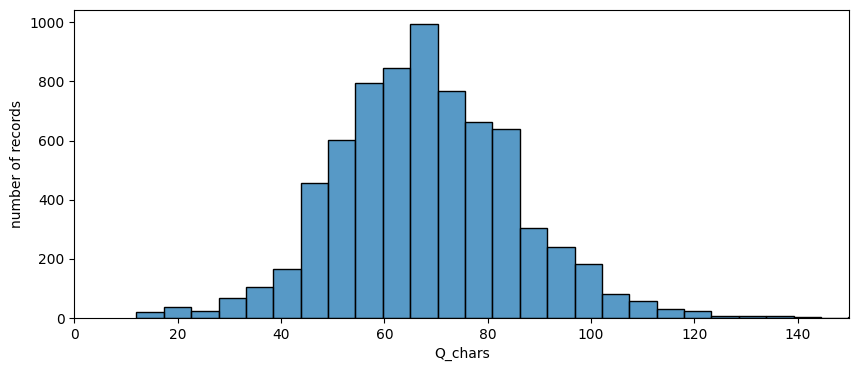

In [11]:
#plot Q_chars distribution
df = df_A
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.histplot(data=df, x='Q_chars', bins=30)
p = ax.set_xlim(0, 150)
p = ax.set_xlabel('Q_chars')
p = ax.set_ylabel('number of records')

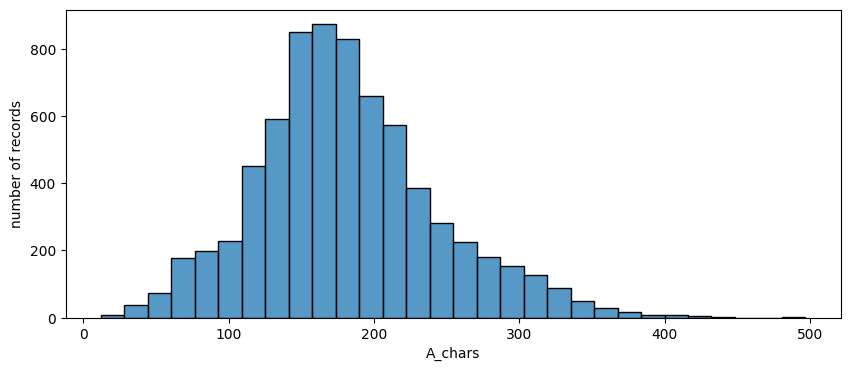

In [12]:
#plot A_chars distribution
df = df_A
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.histplot(data=df, x='A_chars', bins=30)
#p = ax.set_xlim(0, 150)
p = ax.set_xlabel('A_chars')
p = ax.set_ylabel('number of records')

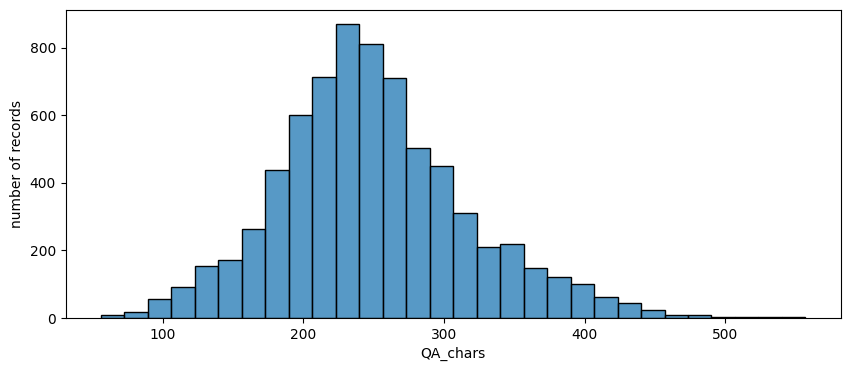

In [13]:
#plot Q_chars + A_chars distribution
df = df_A
df['QA_chars'] = df.Q_chars + df.A_chars
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.histplot(data=df, x='QA_chars', bins=30)
#p = ax.set_xlim(50, 550)
p = ax.set_xlabel('QA_chars')
p = ax.set_ylabel('number of records')

In [14]:
df_A.sample(10)

,question,answer,train_test,Q_chars,A_chars,QA_chars
248,What is the new feature introduced in CUDA 11.2 regarding inlining?,CUDA 11.2 introduces the capability to know which functions were inlined and which weren't. This feature provides insights into the inlining decisions and reasons for non-inlining.,train,67,180,247
6822,What is 'atomic operation' in CUDA and why is it important?,"Atomic operations in CUDA ensure that memory updates are performed atomically without interference from other threads, critical for avoiding race conditions.",train,59,157,216
3150,What is the significance of the Tesla P40 and P4 accelerators?,The Tesla P40 and P4 accelerators are part of the Pascal architecture and provide accelerated inference in data center applications.,test,62,132,194
3426,What is the purpose of the API cudaGraphNodeGetEnabled?,The API cudaGraphNodeGetEnabled in CUDA 11.6 allows querying the enabled state of a node in a graph.,train,55,100,155
4118,How does the shuffle instruction contribute to better GPU kernel performance?,"The shuffle instruction contributes to better GPU kernel performance by enabling faster and more efficient inter-thread communication within a warp, reducing the need for memory synchronization and improving data sharing.",train,77,221,298
538,How does CUDA provide support for FP16 arithmetic?,"CUDA defines the half and half2 types for FP16 arithmetic. The CUDA header cuda_fp16.h includes intrinsic functions for operating on half data, providing a suite of half-precision intrinsics for various operations.",train,50,214,264
5123,What is the purpose of PTX ISA 7.4 in CUDA 11.4?,"PTX ISA 7.4 in CUDA 11.4 provides more control over caching behavior of L1 and L2 caches, offering capabilities for optimizing memory access patterns and performance.",train,48,166,214
3896,Where can developers find more detailed information about the SHFL instruction?,"Developers can find more detailed information about the SHFL instruction in the NVIDIA CUDA Programming Guide, specifically in the section on warp shuffle functions.",test,79,165,244
442,What is the relationship between hash maps and memory access patterns on GPUs?,Hash maps exhibit memory access patterns that align well with the random memory access capabilities of GPUs. This alignment contributes to efficient data retrieval and processing on GPU architectures.,train,78,200,278
2956,How can variadic templates improve code readability?,"Variadic templates can improve code readability by reducing the need for multiple overloaded functions or function templates, leading to cleaner and more concise code.",train,52,167,219


In [15]:
#preserve Q&A columns
df = df_A
cols = ['question', 'answer', 'train_test']
df = df[cols]
pd.set_option('display.max_colwidth', 200)
df_slim = df
df_slim.head()

,question,answer,train_test
0,What is Hybridizer?,Hybridizer is a compiler from Altimesh that enables programming GPUs and accelerators using C# code or .NET Assembly.,train
1,How does Hybridizer generate optimized code?,Hybridizer uses decorated symbols to express parallelism and generates source code or binaries optimized for multicore CPUs and GPUs.,test
2,What are some parallelization patterns mentioned in the text?,"The text mentions using parallelization patterns like Parallel.For and distributing parallel work explicitly, similar to CUDA.",train
3,How can you benefit from accelerators without learning their internal architecture?,You can benefit from accelerators' compute horsepower without learning the details of their internal architecture by using patterns like Parallel.For or CUDA-like distribution of parallel work.,train
4,What is an example of using Hybridizer?,An example in the text demonstrates using Parallel.For with a lambda to leverage the compute power of accelerators.,train


In [16]:
#create list of messages per 
#https://github.com/oracle-samples/oci-data-science-ai-samples/blob/main/ai-quick-actions/sample-datasets/evaluation-sample-no-sys-message.jsonl
df = df_slim
train = []
test = []
for idx, row in df.iterrows():
    instruction = "Provide a succinct answer to the following question: "
    body = row['question']
    prompt = instruction + body
    answer = row['answer']
    train_test = row['train_test']
    message_dict = {
        "prompt": prompt,
        "completion": answer   ,
    }
    if (train_test == 'train'):
        train += [message_dict]
    else:
        test += [message_dict]
print ('len(train) = ', len(train))
print ('len(test) = ', len(test))

len(train) =  6331
len(test) =  777


In [17]:
train[1]

{'prompt': 'Provide a succinct answer to the following question: What are some parallelization patterns mentioned in the text?',
 'completion': 'The text mentions using parallelization patterns like Parallel.For and distributing parallel work explicitly, similar to CUDA.'}

In [18]:
#write train.jsonl...6k records, 2Mb 
sample = train
file = 'data/train.jsonl'
import json
with open(file, "w") as f:
    for line in sample:
        json.dump(line, f)
        f.write("\n")
print ('len(train) = ', len(train))

len(train) =  6331


In [19]:
#spot-check data/train.jsonl
!head -4 data/train.jsonl | tail -1

{"prompt": "Provide a succinct answer to the following question: What is an example of using Hybridizer?", "completion": "An example in the text demonstrates using Parallel.For with a lambda to leverage the compute power of accelerators."}


In [20]:
#write test.jsonl
sample = test
file = 'data/test.jsonl'
import json
with open(file, "w") as f:
    for line in sample:
        json.dump(line, f)
        f.write("\n")
print ('len(test) = ', len(test))

len(test) =  777


In [21]:
#spot-check data/test.jsonl
!head -50 data/test.jsonl | tail -10

{"prompt": "Provide a succinct answer to the following question: What is the significance of the combined L1 Data Cache and Shared Memory subsystem in the Volta SM?", "completion": "The combined L1 Data Cache and Shared Memory subsystem in the Volta SM improves performance while simplifying programming. It enhances data access and utilization, resulting in better overall efficiency for memory-intensive applications."}
{"prompt": "Provide a succinct answer to the following question: What are some of the specific benefits of CUDA 9's libraries?", "completion": "CUDA 9's libraries offer optimized and GPU-accelerated algorithms for various domains, including deep learning, image processing, signal processing, and linear systems. These libraries are designed to achieve top-notch performance on the Volta platform, utilizing features like Tensor Cores to deliver faster computations."}
{"prompt": "Provide a succinct answer to the following question: How did RAPIDS cuDF integrate GPU hash maps,

In [22]:
#push train.jsonl to ObjStore 
!ns=orasenatdpltintegration03 ;\
bucket_name=JoeHahnQuickActions ;\
bs_file=data/train.jsonl ;\
os_file=quick_actions/tuning_data/tune_sample.jsonl ;\
oci os object put --bucket-name $bucket_name --file $bs_file --name $os_file -ns $ns --auth resource_principal --force

Uploading object  [####################################]  100%
{
  "etag": "dd61ed1b-dc4e-4e3a-b9e2-7d5ae50c31f1",
  "last-modified": "Tue, 16 Sep 2025 22:07:27 GMT",
  "opc-content-md5": "5bxFM1Xh+ag7qKWgUfAIAA=="
}


In [23]:
#done
print('execution time (min) = ', (tm.time() - clock_start)/60.0)

execution time (min) =  0.0879877249399821
